# EndotyPy package usage

In [1]:
import EndotypY as edy #type: ignore
import pickle
import networkx as nx


# manual test case seed clustering

In [2]:
# 1. Create an empty graph
G_test = nx.Graph()

# 2. Define seeds and the central hub node
seeds = ["S1", "S2", "S3", "S4"]
hub_node = "HUB"
spoke_len = 39 # This ensures the hub is the 40th node added

# 3. Build the spokes and connect them to the hub
for i, seed in enumerate(seeds):
    # The first node in the spoke is the seed itself
    previous_node = seed
    G_test.add_node(seed)
    
    # Create a chain of nodes for the spoke
    for j in range(spoke_len - 1):
        # Node names are unique to each spoke, e.g., "S1_node_1", "S2_node_1"
        new_node = f"{seed}_node_{j}"
        G_test.add_edge(previous_node, new_node)
        previous_node = new_node
        
    # Connect the end of the spoke to the central hub
    G_test.add_edge(previous_node, hub_node)

print(f"Test graph created with {G_test.number_of_nodes()} nodes and {G_test.number_of_edges()} edges.")
print(f"Seeds are: {seeds}")
print(f"Shortest path between S1 and S2 is {len(nx.shortest_path(G_test, 'S1', 'S2')) - 1} hops.")



Test graph created with 157 nodes and 156 edges.
Seeds are: ['S1', 'S2', 'S3', 'S4']
Shortest path between S1 and S2 is 78 hops.


In [4]:
test_case = edy.Endotyper()
test_case.network = G_test
test_case.seeds = seeds

test_case.prepare_rwr(r=0.8)

Preparing RWR...
Inverting the matrix takes time, please be patient...
RWR matrix prepared successfully


Running RWR for seed genes: 100%|██████████| 4/4 [00:00<00:00, 3987.93it/s]

Testing neighborhood sizes in parallel on 8 cores...



100%|██████████| 6/6 [00:00<00:00, 120410.64it/s]

Optimal neighborhood size found at k=10 with 4 cluster(s).


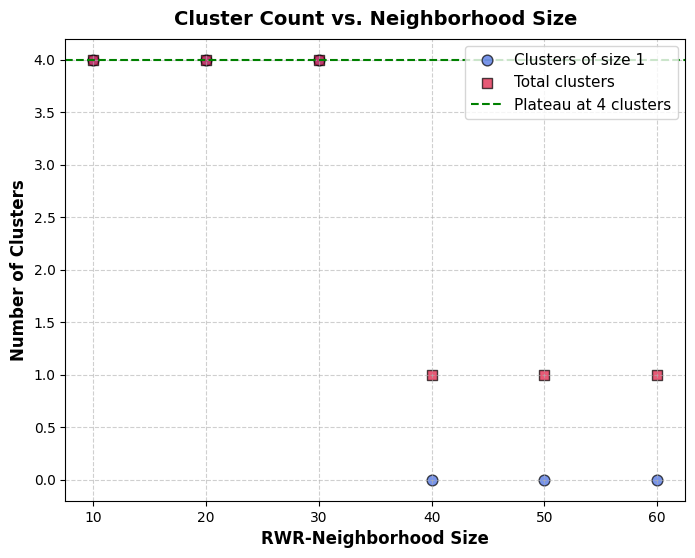

4 Seed clusters identified


{'cluster_seed_1': ['S1'],
 'cluster_seed_2': ['S2'],
 'cluster_seed_3': ['S3'],
 'cluster_seed_4': ['S4']}

In [5]:
test_case.explore_seed_clusters(scaling=True, k=60)

# endotypy analsysis

In [ ]:
endo = edy.Endotyper()

# read in a graph from a file
path_ppi = 'monocyte.tsv'
#path_ppi = 'ppi.txt'
endo.import_network(path_ppi)

#path_seed = 'ibd_risk_genes_F.txt'
path_seed = 'ibd_risk_genes_mini.txt'
#read in a seed set from a file
#path_seed = 'example_seeds.txt'
endo.import_seeds(path_seed)

endo

In [ ]:
#prepare RWR
endo.prepare_rwr(r=0.8)

In [ ]:
#explore the seed clusters
endo.explore_seed_clusters(scaling=True, k=50)

In [ ]:
endo.extract_disease_module(seed_cluster_id = None, scaling=True, k=200)

In [ ]:
endo.define_local_neighborhood(scaling=True, neighbor_percentage=1)

In [ ]:
endo.annotate_local_neighborhood(enrichr_lib='GO_Biological_Process_2023',
                                 organism='Human',
                                 sig_threshold=0.05)

In [ ]:
endo.define_endotypes()

In [ ]:
endo.plot_endotype(iteration=3, node_size='degree', path_length=3)

In [ ]:
endo.plot_endotype(iteration=1, node_size='degree', path_length=3)

In [ ]:

endo.plot_endotype(iteration=1, cluster_id=2, node_size='betweenness', path_length=3)

In [ ]:

endo.plot_multiple_endotypes(node_size='degree', path_length=2)

In [ ]:
class_attributes = vars(endo).keys()

for attr in class_attributes:
    print(attr)